# Тестовое задание в "*mindbox*"
___
___

### Условия
___
- Цель: группировка клиентов для АБ-тестов
- Алгоритм: номером группы является сумма цифр клиентского ID
- Дополнительно: ID-клиента - число состоящее из 5-7 цифр, например: 7412567


### Задачи
___
Написать диагностические функции для оценки указанного алгоритма:
- Функция, которая подсчитывает число покупателей, попадающих в каждую группу,
если нумерация ID сквозная и начинается с 0.
На вход функция получает целое число n_customers (количество клиентов).
- Функция, аналогичная первой, если ID начинается с произвольного числа.
На вход функция получает целые числа: n_customers (количество клиентов) и n_first_id (первый ID в последовательности).


### Рассуждения
___
1. До конца неясна связь условия и задачи:
- Условие - *ID-клиента - число состоящее из 5-7 цифр*
- Задача - *нумерация начинается с 0*
2. 5-7 цифр - это может быть 5, либо 6, либо 7? Или подразумевается диапазон от 10000 до 9999999 (то есть от
минимального пятизначного числа до максимального семизначного)?
3. В любом из этих случаев - почему нумерация начинается с 0? Предполагается нумерация в виде, например,
00000, 00001, 00002 и т.д. (для 5 цифр в числе). И тогда диапазон id выглядит как [0000000, 9999999] (для 7 цифр)?
В идеале такие вещи уточнять с заказчиком в рамках согласования ТЗ, но раз это тестовое - обходимся своей логикой.
Итак для реализаций принимаем:
- максимально возможный id клиента равен 9999999;
- если начинать отсчет id с нуля и оставлять оформление id например в виде 00027 - то это использовать строковый тип
данных, который все равно будет преобразован в целочисленный для манипуляций с арифметическими операциями, поэтому
сразу сгенерируем целочисленные id в диапазоне [0, 9999999] (для работы со второй функцией - перемешаем id).
- Ниже (после ячейки с импортами) приведу пример генерации 4-х значного id строкового типа (в малом диапазоне)

### Реализация
___

In [1]:
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Тестовая генерация строковых id
testData = {"ClientID_str" : [f'{i:04}' for i in range(0, 1000)]}
testDf = pd.DataFrame(testData);
rnd.shuffle(testDf["ClientID_str"])
testDf.head()

,ClientID_str
0,0587
1,0059
2,0819
3,0451
4,0129


Для работы с каждой функцией создадим два отдельных Data Frame:
- endToEndNumbering
- randomNumbering

В каждый датафрейм нам необходимо добавить колонку с номером группы для каждого клиента.
Напишем функцию для получения номера группы.

In [3]:
def getGroupNumber(num):
    result = 0
    while (num > 0):
        result += num % 10
        num = num // 10
    return result

In [4]:
# Тесты, при желании раскомментировать
# for _ in range(5):
#     testNum = rnd.randint(100, 999)
#     print(f"Сумма цифр числа {testNum} равна {getGroupNumber(testNum)}")

In [5]:
data = {"Client_ID" : [i for i in range(0, 10000000)]}
endToEndNumberingDF = pd.DataFrame(data);
endToEndNumberingDF["Group_Number"] = endToEndNumberingDF["Client_ID"].apply(getGroupNumber)

In [6]:
endToEndNumberingDF.sample(5)

,Client_ID,Group_Number
4628047,4628047,31
9941942,9941942,38
8881780,8881780,40
392560,392560,25
8196709,8196709,40


In [7]:
rnd.shuffle(data["Client_ID"])
randomNumberingDF = pd.DataFrame(data);
randomNumberingDF["Group_Number"] = randomNumberingDF["Client_ID"].apply(getGroupNumber)

In [8]:
randomNumberingDF.head()

,Client_ID,Group_Number
0,5355180,27
1,7134946,34
2,8914066,34
3,902410,16
4,3258450,27


Создадим для каждого датафрейма колонку с группами

In [9]:
endToEndNumberingDF.describe()

,Client_ID,Group_Number
count,1.000000e+07,1.000000e+07
mean,5.000000e+06,3.150000e+01
std,2.886751e+06,7.599342e+00
min,0.000000e+00,0.000000e+00
25%,2.500000e+06,2.600000e+01
50%,5.000000e+06,3.150000e+01
75%,7.499999e+06,3.700000e+01
max,9.999999e+06,6.300000e+01


In [10]:
randomNumberingDF.describe()

,Client_ID,Group_Number
count,1.000000e+07,1.000000e+07
mean,5.000000e+06,3.150000e+01
std,2.886751e+06,7.599342e+00
min,0.000000e+00,0.000000e+00
25%,2.500000e+06,2.600000e+01
50%,5.000000e+06,3.150000e+01
75%,7.499999e+06,3.700000e+01
max,9.999999e+06,6.300000e+01


In [11]:
endToEndWithGroups = pd.DataFrame(endToEndNumberingDF.groupby('Group_Number').count())

<BarContainer object of 64 artists>

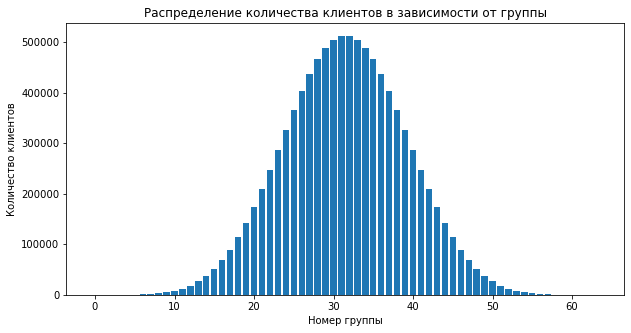

In [12]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
ax.set_xlabel('Номер группы')
ax.set_ylabel('Количество клиентов')
ax.set_title("Распределение количества клиентов в зависимости от группы")
ax.bar(endToEndWithGroups.index, endToEndWithGroups["Client_ID"])

Очевидно что для второго датафрейма (randomNumbering) распределение будет аналогичным, так как датафреймы отличаются только порядком ID клиентов (это так же видно по результатам функции .describe() выше).

### Промежуточные выводы
___
На данном этапе:
 - подготовлено два дата фрейма для реализации поставленных задач
 - кллиенты разбиты по группам согласно условию, проведена оценка распределения клиентов.

Напишем требуемые функции.

### Функция 1
Функция, которая подсчитывает число покупателей, попадающих в каждую группу,
если нумерация ID сквозная и начинается с 0.
На вход функция получает целое число n_customers (количество клиентов).

In [13]:
# Функция в которой клиенты берутся подряд со случаной позиции
def getClientCountNormal_1(n_custumers : int, df : pd.DataFrame) -> pd.DataFrame:
    startPosition = rnd.randint(0, len(df) - n_custumers)
    result =df[startPosition:startPosition + n_custumers].groupby("Group_Number").count()
    return result

# Функция в которой клиенты берутся случайным образом
def getClientCountRandom(n_custumers : int, df : pd.DataFrame) -> pd.DataFrame:
    return df.sample(n_custumers).groupby("Group_Number").count()

In [14]:
gettingClientByNormal = getClientCountNormal_1(1000, endToEndNumberingDF)
gettingClientByRandom = getClientCountRandom(1000, endToEndNumberingDF)

<a name="diag1">Диаграмма 1.</a>

<BarContainer object of 45 artists>

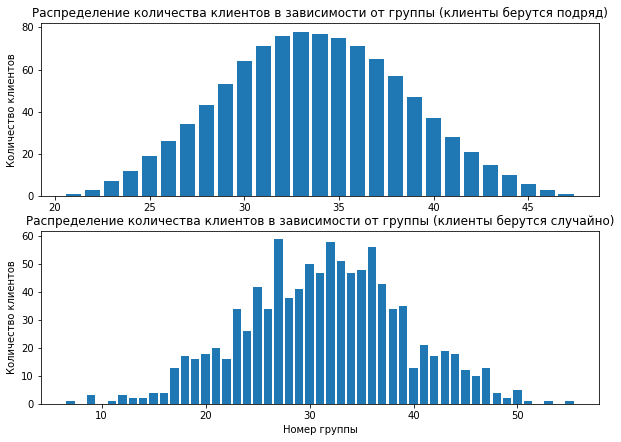

In [15]:
fig, ax = plt.subplots(2)
fig.set_figwidth(10)
fig.set_figheight(7)
ax[0].set_ylabel('Количество клиентов')
ax[1].set_xlabel('Номер группы')
ax[1].set_ylabel('Количество клиентов')
ax[0].set_title("Распределение количества клиентов в зависимости от группы (клиенты берутся подряд)")
ax[1].set_title("Распределение количества клиентов в зависимости от группы (клиенты берутся случайно)")
ax[0].bar(gettingClientByNormal.index, gettingClientByNormal["Client_ID"])
ax[1].bar(gettingClientByRandom.index, gettingClientByRandom["Client_ID"])

### Функция 2
Функция, аналогичная первой, если ID начинается с произвольного числа.
На вход функция получает целые числа: n_customers (количество клиентов) и n_first_id (первый ID в последовательности).
___
*Тут явно указано что задается первый id в последовательности, значит клиентов выбираем только подряд*

In [16]:
def getClientCountNormal_2(n_custumers : int, n_first_id : int, df : pd.DataFrame):

    if n_first_id > len(df):
        return "Некорректный id клиента."
    else:
        # Проверка на случай если индекс выбранного клиента не позволит взять подряд нужное число клиентов
        # Например длина датафрейма 100, индекс выбранного клиента равен 95 а нам надо взять 10 человек
        ind = df.loc[df["Client_ID"] == n_first_id].index[0]
        if df.loc[df["Client_ID"] == n_first_id].index[0] > len(df) - n_custumers:
            return df[ind - n_custumers:ind].groupby("Group_Number").count()
        else:
            return df[ind:ind + n_custumers].groupby("Group_Number").count()

In [17]:
clientsGroupDistributionRnd = getClientCountNormal_2(10000, rnd.randint(0, 10000000), randomNumberingDF)

Сравним сразу графически с gettingClientByRandom
<a name="diag2">Диаграмма 2</a>

<BarContainer object of 52 artists>

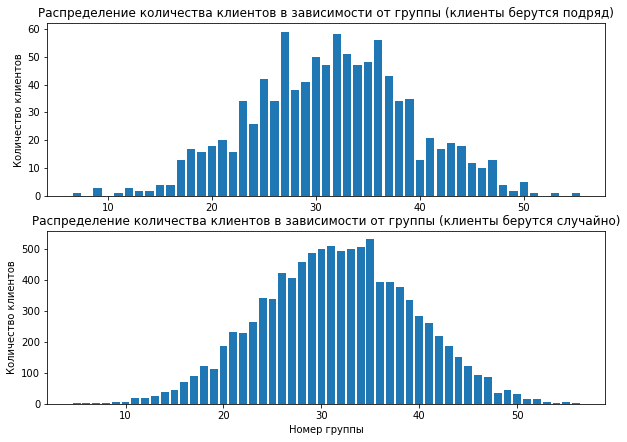

In [18]:
fig, ax = plt.subplots(2)
fig.set_figwidth(10)
fig.set_figheight(7)
ax[0].set_ylabel('Количество клиентов')
ax[1].set_xlabel('Номер группы')
ax[1].set_ylabel('Количество клиентов')
ax[0].set_title("Распределение количества клиентов в зависимости от группы (клиенты берутся подряд)")
ax[1].set_title("Распределение количества клиентов в зависимости от группы (клиенты берутся случайно)")
ax[0].bar(gettingClientByRandom.index, gettingClientByRandom["Client_ID"])
ax[1].bar(clientsGroupDistributionRnd.index, clientsGroupDistributionRnd["Client_ID"])

## Выводы
___

Функции служили для проверки эффективности алгоритма.
По результатам работы с функциями - можно сделать следующие выводы:
- функция **getClientCountNormal_1** возвращает датафрейм с заданным количеством клиентов, начиная со случайного id клиента. Клиенты берутся подряд. Результат максимально приближен к нормальному распределению ([см. диаграмму](#diag1) ). Равномерность распределения по группам отсутствует.
- функция **getClientCountRandom** возвращает датафрейм с заданным количеством клиентов. Клиенты берутся случайным образом. Результат похож на нормальное распределение, но не настолько как первая функция ([см. диаграмму](#diag1) ). Равномерность распределения по группам все еще отсутствует.
- функция **getClientCountNormal_2** возвращает датафрейм с заданным количеством клиентов, начиная с заданного id клиента. Клиенты берутся подряд. Результат похож на нормальное распределение, но не настолько как первая функция ([см. диаграмму](#diag2) ). Равномерность распределения по группам все еще отсутствует. (Результат - нечто среднее между результатами функций getClientCountNormal_1 и getClientCountRandom)

## Предложения:
- если стремимся получить примерно равное распределение по группам - меняем алгоритм распределения
- если такого стремления нет - смотрим на график распределения клиентов по группам и выбираем группы с необходимым количеством клиентов